<a href="https://colab.research.google.com/github/Pramurta/Neural-Nets-Assignment-2/blob/main/NN_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255 and image augmentation has also been used to reduce variance in our training
train_datagen = ImageDataGenerator(
      rescale=1./255,
      zoom_range=0.3,
      horizontal_flip=True,
      brightness_range=[0.4,1.5],
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 140 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'train',  # This is the source directory for training images
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical')

# Flow validation images in batches of 30 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'val',  # This is the source directory for validation images
        target_size=(150, 150),  
        batch_size=64,
        class_mode='categorical')

Found 20000 images belonging to 10 classes.
Found 5000 images belonging to 10 classes.


In [16]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,Model
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D , Dropout
from keras import regularizers


def define_model_vgg16_improvement(image_shape,total_classes):
  print(image_shape[2])

  model = Sequential()
  weight_decay = 0.0005
  learning_rate = 0.1
  lr_decay = 1e-6
  lr_drop = 20
  
  model.add(Conv2D(64, (3, 3), padding='same',input_shape=image_shape,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))


  model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.4))

  model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))

  model.add(Flatten())
  model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())

  model.add(Dropout(0.5))
  model.add(Dense(total_classes))
  model.add(Activation('softmax'))
  sgd = keras.optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
  model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  
  return model


In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def train_model_vgg16(model , train_generator,validation_generator,epochs=10,batch_size=128):
  
  callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint('best_model_vgg16_batch_64', monitor='val_accuracy', verbose=1, save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau( factor = 0.8, patience = 3, min_lr = 0.00001, verbose = 1 ),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 15)
  ]
  history=model.fit(train_generator, epochs = epochs, batch_size = batch_size,callbacks = callbacks, verbose = 1,validation_data = validation_generator)
  return history

In [18]:
improved_model = define_model_vgg16_improvement((150, 150, 3),10)
history = train_model_vgg16(improved_model , train_generator , validation_generator , epochs=200 , batch_size = 64)

3
Epoch 1/200
313/313 [==============================] - ETA: 0s - loss: 63.8692 - accuracy: 0.1690
Epoch 00001: val_accuracy improved from -inf to 0.15580, saving model to best_model_vgg16_batch_64
INFO:tensorflow:Assets written to: best_model_vgg16_batch_64/assets
313/313 [==============================] - 102s 327ms/step - loss: 63.8692 - accuracy: 0.1690 - val_loss: 49.5893 - val_accuracy: 0.1558 - lr: 0.1000
Epoch 2/200
313/313 [==============================] - ETA: 0s - loss: 37.3542 - accuracy: 0.2420
Epoch 00002: val_accuracy did not improve from 0.15580
313/313 [==============================] - 97s 311ms/step - loss: 37.3542 - accuracy: 0.2420 - val_loss: 27.5647 - val_accuracy: 0.1202 - lr: 0.1000
Epoch 3/200
313/313 [==============================] - ETA: 0s - loss: 20.7920 - accuracy: 0.2915
Epoch 00003: val_accuracy improved from 0.15580 to 0.17560, saving model to best_model_vgg16_batch_64
INFO:tensorflow:Assets written to: best_model_vgg16_batch_64/assets
313/313 [====

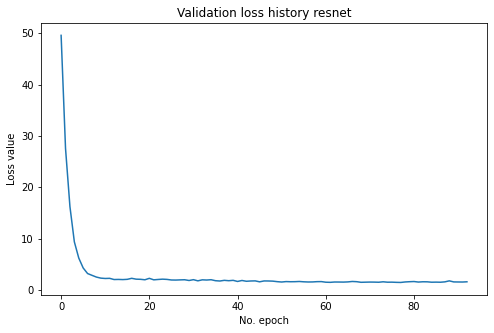

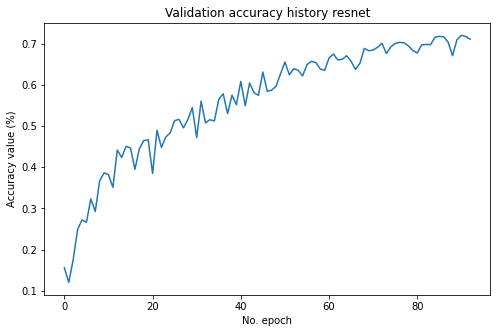

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,5))
plt.plot(history.history['val_loss'])
plt.title('Validation loss history resnet')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.figure(figsize = (8,5))
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history resnet')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()



In [6]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

def ResNet34(shape, classes):
    # Step 1 (Setup Input Layer)Created using Colaboratory
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:

def train_model_resnet34(model , train_generator,validation_generator,epochs=10,batch_size=64):
  callbacks = [ 
    tf.keras.callbacks.ModelCheckpoint('best_model_resnet34', monitor='val_accuracy', verbose=1, save_best_only=True),
    tf.keras.callbacks.ReduceLROnPlateau( factor = 0.1, patience = 5, min_lr = 0.000001, verbose = 1 ),
    tf.keras.callbacks.EarlyStopping(monitor = 'val_loss' , patience = 15)
  ]
  history=model.fit(train_generator, epochs = epochs , validation_data=validation_generator,batch_size= 128 , callbacks = callbacks)
  return history

In [ ]:
model_resnet=ResNet34((150, 150, 3),10)
train_model_resnet34(model_resnet , train_generator , validation_generator , epochs=100 , batch_size = 64)